# Linear regression and binary classification, a friendly introduction

# Introduction
- Surprisingly, a linear polynomial can provide a good output approximation to predict a real-valued number based on an n-dimensional input vector.

# An introduction to linear regression
Let’s consider a dataset composed of discrete values scattered around in a way that a straight line can pass through them while all the data are within a certain distance from the line.

## The theory
Remembering from high-school math, we know that in a two-dimensional space a straight line can be represented as a function, formalized as the following:

$$f:\mathcal{D} \rightarrow \mathcal{R}$$
$$y = f(x) = ax + b$$
Now if $\mathcal{D}=\left\{0,1, 2, 3, ..., 49\right\}$, then for $a=2$ and $b=1$, $\mathcal{R}$ is a set including all positive odd numbers that are less than $100$.

In the following code we create such data and plot the function.

In [8]:
import numpy as np #a library for array operations
import matplotlib.pyplot as plt #Python 2D plotting library
import random as rnd
import seaborn as sns           #Plotting library based on matplotlib that can take pandas.DataFrame inputs
import pandas as pd             #tabular data structure with SQL-like function support
import boto3                    #Python SDK for AWS services
import os

In [9]:
range_start = 0
range_end = 49

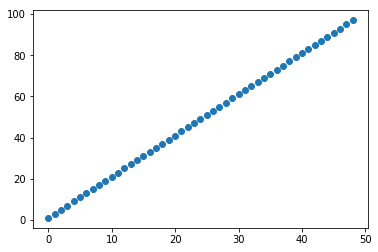

In [10]:
d = np.arange(range_start, range_end)
r = list(map(lambda x: 2 * x + 1, d)) #function y = 2x+1 for domain d, returning the range as a list
plt.scatter(d, r, )
plt.show()

**Adding Noise:**
The problem is that the data in real life is noisy and almost never follows a perfect line. In many cases, however the distribution of data permits us to approximate the data to a line that represents the distribution with some error. The following code synthesizes a dataset based on the same function, except that the domain will be a random normal distribution with some random noise between 0 and 1.

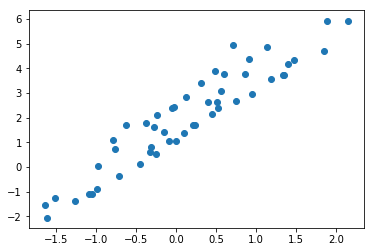

In [11]:
rnd.seed(42)
noise_factor = lambda x: rnd.random() * x
np.random.seed(13)
d = np.random.normal(loc=range_start, scale=1, size=range_end + 1)
r = list(map(lambda x: 2 * x + 1 + rnd.random()* noise_factor(3), d))
plt.scatter(d, r, )
plt.show()

# Generalization
- It is noticeable that a straight line can provide a good approximation for the data distribution. in a multi-dimensional world, where the function variable is a vector such as `<age, income, postal district, ...>`, our function would be:
$$f:{V} \subseteq \mathbb{R}^n  \rightarrow \mathcal{R} \subseteq \mathbb{R}
\\ 
y = f(V) = V.W + b
$$

- In this case, V is the input feature vector, w is a parameter or weight vector, and b is bias. The task of linear regression is to find optimal w and b in order to approximate the data to a line.

## Genralized Example
- Suppose we have a 4D input space $$V=[inv_1=gender, v_2=age, v_3=education, v_4=postal\_district]$$ 
We want to predict income. Since the range of the function is $\mathbb {R}$ and $V$ has a dimension of $1 \times 4$, we should find $W_{4 \times 1}$ and scalar $b$ to solve the linear regression problem.

$$
f: \mathbb{R^4} \rightarrow \mathbb{R} \\ 
f(V) = \left[\begin{array}{cc} v_1 & v_2 & v_3 & v_4 \end{array}\right]_{1 \times 4} \ 
\left[\begin{array}{cc} w_1\\ w_2\\ w_3\\ w_4 \end{array}\right]_{4 \times 1} \
+ b  = y \ \epsilon \ \mathbb {R}
$$

- In machine learning the input space is nearly always multi-dimensional, but in our examples and plots we have used synthetic data in order to simplify the presentation.

*Challenge: You can change the shape and noise of the data and check the results.*

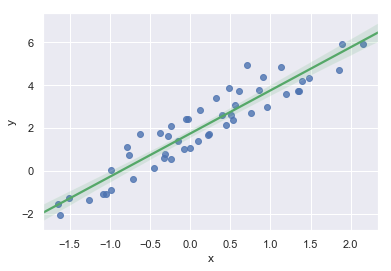

In [12]:
noisy_data = pd.DataFrame(np.column_stack((d, r)), columns=['x', 'y'])
sns.set(color_codes=True)
sns.regplot('x', 'y', data=noisy_data, line_kws={'color': 'g'}, scatter_kws={'color':'b'})
plt.show()


In [13]:
print("in the perfect world f(d[5]) = f({}) = {}".format(d[5], 2*d[5]+1))
print("in the reality f(d[5]) = f({}) = {}".format(d[5], r[5]))


in the perfect world f(d[5]) = f(0.5323378882945463) = 2.064675776589093
in the reality f(d[5]) = f(0.5323378882945463) = 2.3961453468307248


# Model error
- In the perfect world f(d[5]) = f(0.5323378882945463) = __2.064675776589093__. 
- In the reality f(d[5]) = f(0.5323378882945463) = **2.3961453468307248**.
- The residual of an observed value is the difference between the observed value and the estimated value.
- This might look like loss of accuracy, but in fact this approximation is the source of the generalization power of machine learning.

## Calculating Loss
- There are many methods of calculating loss. One of the most common for linear regression is or Root Mean Squared Error.
- Root Mean Squared Error (RMSE) is the deviation of the residuals or prediction errors from the fitted model. - - Residuals measure how far are the data-points are from the regression line. RMSE measures the deviation of residuals from the fitted model.
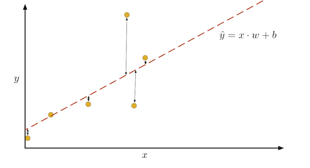

## Calculating Loss - continued
- if $y_i$ is the the observed value for a particular input $x_i$ and $\hat{y_i}$ is the predicted value, then:
$$\mathcal{L} = RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{N}{(y_i - \hat{y_i})^2}}$$
- Other loss functions are also popular such as Absolute Mean Square Error:
$$
MAE = \frac{1}{1} \sum_{i=1}^{n}|\hat{y_i}-y_i|
$$
- RMSE magnifies the magnitude of errors and that affects large errors more pronouncedly. Thus it is more effective if you need to penalize large errors.

# An example
- A classic example of linear regression is a survival score for a passenger in Titanic's infamous maiden voyage. 
- We want to project a probability for survival of a passenger, given the features that represent the passenger.
- We also want to make a binary prediction whether or not a passenger will survive.

# False Positive/True Positive/True Negative
-	A false positive prediction in our example is when the model predicts survival when the person has not survived.
-	A true positive prediction in our example is when the model predicts survival correctly.
-	A false negative prediction in our example is when the model predicts not-survived while the person has survived.
-	A true negative prediction in out example is when the model correctly predicts that a passenger has not survived.


# Acuracy/Precision/Recall
- Accuracy - Accuracy is simply a ratio of correctly predicted observation to the total observations. 
 - **Accuracy** = 1- (FP+FN)/NE
- Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
 - **Precision** = TP/(TP+FP)
- Recall (Sensitivity) is the ratio of correctly predicted positive observations to the all observations in actual class
 - **Recall** = TP/(TP+FN)
- F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.
 - **F1 Score** = 2*(Recall * Precision) / (Recall + Precision)